# Task :- 
## Automatic essay scoring based on the content of the essay

# Lets import some libraries required 

In [1]:
import pandas as pd #data manipulation
import numpy as np #numerical computation
import seaborn as sns #data visualization 
print("Setup complete")

Setup complete


In [2]:
data=pd.read_csv("train.csv")
print("train set")

train set


In [3]:
data_test=pd.read_csv('test.csv')
print('test set')

test set


# Lets check if the dataset is correctly imported or not by looking at top 5 rows of the dataset

In [4]:
data.head()

,Unnamed: 0,promptId,uniqueId,essay,evaluator_rating
0,0,1,1_323,"At present age, our education system is not go...",3.0
1,1,1,1_238,I am agree the tightly defined curriculum of o...,4.0
2,2,1,1_212,I strongly agree with the statement that tight...,2.0
3,3,1,1_117,Our education system is nice quitely but i dis...,2.0
4,4,1,1_229,i am totally agree with the statement that tig...,3.0


In [5]:
data_test.head()

,Unnamed: 0,promptId,uniqueId,essay
0,0,1,1_315,Curriculum has been adopted in many schools. T...
1,1,1,1_214,"I strongly agree with the statement , The tig..."
2,2,1,1_196,Imagination and creativity is the most importa...
3,3,1,1_178,In our eduction system leaves no room for imag...
4,4,1,1_201,"I will agree at some what extend, because if w..."


## promptId is the unique ID for the specific question that the student has to answer
## uniqueId is the ID for essay in the dataset 
### evaluator_rating is the target variable

In [6]:
# lets drop Unnamed:0 

data=data.drop('Unnamed: 0',axis=1)
data.head()

,promptId,uniqueId,essay,evaluator_rating
0,1,1_323,"At present age, our education system is not go...",3.0
1,1,1_238,I am agree the tightly defined curriculum of o...,4.0
2,1,1_212,I strongly agree with the statement that tight...,2.0
3,1,1_117,Our education system is nice quitely but i dis...,2.0
4,1,1_229,i am totally agree with the statement that tig...,3.0


In [7]:
data_test=data_test.drop('Unnamed: 0',axis=1)
data_test.head()

,promptId,uniqueId,essay
0,1,1_315,Curriculum has been adopted in many schools. T...
1,1,1_214,"I strongly agree with the statement , The tig..."
2,1,1_196,Imagination and creativity is the most importa...
3,1,1_178,In our eduction system leaves no room for imag...
4,1,1_201,"I will agree at some what extend, because if w..."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   promptId          1240 non-null   int64  
 1   uniqueId          1240 non-null   object 
 2   essay             1240 non-null   object 
 3   evaluator_rating  1240 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 38.9+ KB


# Bag of words on essay column

In [9]:
import nltk #nlp library
import re #text preprocessing
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer #either use stemming or lemmatizer 

In [10]:
def clean_text(text):
    wordnet=WordNetLemmatizer()
    text=text.lower() #lowering all the words in the text
    text=re.sub('[^a-zA-Z]','',text) # substituting all characters other than A-Z and a-z with space
    text=[wordnet.lemmatize(word) for word in text]
    text=''.join(text).lower()
    return text

In [11]:
data['essay']=data['essay'].apply(lambda x:clean_text(x)) #train set
data_test['essay']=data_test['essay'].apply(lambda x:clean_text(x)) #test set

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
vecs=cv.fit_transform(data['essay']).toarray() #train
vec_test=cv.fit_transform(data_test['essay']).toarray() #test

In [13]:
vecs=pd.DataFrame(vecs)
print(vecs)
vec_test=pd.DataFrame(vec_test)

      0     1     2     3     4     5     6     7     8     9     ...  1230  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1235     0     0     0     0     0     0     0     0     0     0  ...     0   
1236     0     0     0     0     0     0     0     0     0     0  ...     0   
1237     0     0     0     0     0     0     0     0     0     0  ...     0   
1238     0     0     0     0     0     0     0     0     0     0  ...     0   
1239     0     0     0     0     0     0     0     0     0     0  ...     0   

      1231  1232  1233  1234  1235  1236  1237  123

In [14]:
data_train=pd.concat([data,vecs],axis=1)
print(data_train)
data_test=pd.concat([data_test,vec_test],axis=1)

      promptId uniqueId                                              essay  \
0            1    1_323  atpresentageoureducationsystemisnotgoodbecause...   
1            1    1_238  iamagreethetightlydefinedcurriculumofoureducat...   
2            1    1_212  istronglyagreewiththestatementthattightschedul...   
3            1    1_117  oureducationsystemisnicequitelybutidisagreebec...   
4            1    1_229  iamtotallyagreewiththestatementthattightlydefi...   
...        ...      ...                                                ...   
1235         5    5_419  theentireworldisintheraceofproducingarmsandwea...   
1236         5    5_420  theraceinthedevelopmentofweaponsareproceedingd...   
1237         5    5_421  inanerawhereeverysecondpersonhopesandworkstowa...   
1238         5    5_422  introductionsincethebeginningofthetimeofthehum...   
1239         5    5_423  toconqueranationfirstdisarmitscitizensadolfhit...   

      evaluator_rating  0  1  2  3  4  5  ...  1230  1231  1232

# independent and dependent 

In [15]:
columns=['evaluator_rating','essay']
x= data_train.drop(columns,axis=1)
y= data_train['evaluator_rating']
print(y)
data_test=data_test.drop('essay',axis=1)

0       3.0
1       4.0
2       2.0
3       2.0
4       3.0
       ... 
1235    3.0
1236    2.5
1237    4.0
1238    3.0
1239    4.5
Name: evaluator_rating, Length: 1240, dtype: float64


In [16]:
data_test

,promptId,uniqueId,0,1,2,3,4,5,6,7,...,295,296,297,298,299,300,301,302,303,304
0,1,1_315,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1_214,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1_196,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1_178,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1_201,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,5,5_146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
301,5,5_65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302,5,5_151,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303,5,5_404,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x.shape,data_test.shape

((1240, 1242), (305, 307))

# Observe we have mismatch in the train and test shape 

In [18]:
features_diff=set(x)-set(data_test)

In [19]:
feature_difference_df = pd.DataFrame(data=np.zeros((data_test.shape[0], len(features_diff))),columns=list(features_diff))
data_test=data_test.join(feature_difference_df)
data_test

,promptId,uniqueId,0,1,2,3,4,5,6,7,...,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239
0,1,1_315,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1_214,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1_196,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1_178,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1_201,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,5,5_146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,5,5_65,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,5,5_151,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,5,5_404,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Lets build a model

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [21]:
ypred=lr.predict(data_test)

In [42]:
import pickle 
pickle.dump(lr,open('bagofwords.pkl','wb'))

In [22]:
ypred=pd.DataFrame(ypred,columns=['predicted_score'])
print(ypred)

     predicted_score
0           2.987726
1           2.951872
2           2.998296
3          -0.045243
4           4.498698
..               ...
300         2.997396
301         3.982436
302         2.062256
303         0.002845
304         2.546826

[305 rows x 1 columns]


In [23]:
test=pd.read_csv('test.csv')
test

,Unnamed: 0,promptId,uniqueId,essay
0,0,1,1_315,Curriculum has been adopted in many schools. T...
1,1,1,1_214,"I strongly agree with the statement , The tig..."
2,2,1,1_196,Imagination and creativity is the most importa...
3,3,1,1_178,In our eduction system leaves no room for imag...
4,4,1,1_201,"I will agree at some what extend, because if w..."
...,...,...,...,...
300,300,5,5_146,Earth is a creation of God and everything that...
301,301,5,5_65,production of arms and weapons in this present...
302,302,5,5_151,Race to become more powerful can destroy the e...
303,303,5,5_404,In its attempt to harness the power of the ato...


In [24]:
test_prediction=pd.concat([test,ypred],axis=1)
test_prediction

,Unnamed: 0,promptId,uniqueId,essay,predicted_score
0,0,1,1_315,Curriculum has been adopted in many schools. T...,2.987726
1,1,1,1_214,"I strongly agree with the statement , The tig...",2.951872
2,2,1,1_196,Imagination and creativity is the most importa...,2.998296
3,3,1,1_178,In our eduction system leaves no room for imag...,-0.045243
4,4,1,1_201,"I will agree at some what extend, because if w...",4.498698
...,...,...,...,...,...
300,300,5,5_146,Earth is a creation of God and everything that...,2.997396
301,301,5,5_65,production of arms and weapons in this present...,3.982436
302,302,5,5_151,Race to become more powerful can destroy the e...,2.062256
303,303,5,5_404,In its attempt to harness the power of the ato...,0.002845


In [25]:
test_prediction.to_csv("test_prediction.csv")

In [26]:
ypred_ontrain=lr.predict(x)

In [27]:
from sklearn.metrics import mean_squared_error as mae

mae(ypred_ontrain,y) #on train set

1.7291098964415303e-25

In [28]:
test=pd.read_csv('test.csv')
test=test.drop('Unnamed: 0',axis=1)

In [29]:
test['essay']=test['essay'].apply(lambda x:clean_text(x)) #test set

# TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()
vecs=cv.fit_transform(data['essay']).toarray() #train
vec_test=cv.fit_transform(test['essay']).toarray() #test

In [31]:
vecs=pd.DataFrame(vecs)
vec_test=pd.DataFrame(vec_test)

In [32]:
data_train=pd.concat([data,vecs],axis=1)
print(data_train)
test=pd.concat([test,vec_test],axis=1)

      promptId uniqueId                                              essay  \
0            1    1_323  atpresentageoureducationsystemisnotgoodbecause...   
1            1    1_238  iamagreethetightlydefinedcurriculumofoureducat...   
2            1    1_212  istronglyagreewiththestatementthattightschedul...   
3            1    1_117  oureducationsystemisnicequitelybutidisagreebec...   
4            1    1_229  iamtotallyagreewiththestatementthattightlydefi...   
...        ...      ...                                                ...   
1235         5    5_419  theentireworldisintheraceofproducingarmsandwea...   
1236         5    5_420  theraceinthedevelopmentofweaponsareproceedingd...   
1237         5    5_421  inanerawhereeverysecondpersonhopesandworkstowa...   
1238         5    5_422  introductionsincethebeginningofthetimeofthehum...   
1239         5    5_423  toconqueranationfirstdisarmitscitizensadolfhit...   

      evaluator_rating  0  1  2  3  4  5  ...  1230  1231  1232

In [33]:
columns=['evaluator_rating','essay']
x= data_train.drop(columns,axis=1)
y= data_train['evaluator_rating']
print(y)
test=test.drop('essay',axis=1)

0       3.0
1       4.0
2       2.0
3       2.0
4       3.0
       ... 
1235    3.0
1236    2.5
1237    4.0
1238    3.0
1239    4.5
Name: evaluator_rating, Length: 1240, dtype: float64


In [34]:
x.shape,test.shape

((1240, 1242), (305, 307))

# Shape mismatch is observed

In [35]:
features_diff=set(x)-set(test)
feature_difference_df = pd.DataFrame(data=np.zeros((test.shape[0], len(features_diff))),columns=list(features_diff))
test=test.join(feature_difference_df)
data_test


,promptId,uniqueId,0,1,2,3,4,5,6,7,...,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239
0,1,1_315,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1_214,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1_196,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1_178,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1_201,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,5,5_146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,5,5_65,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,5,5_151,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,5,5_404,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Lets build a model of linear regression

In [36]:
from sklearn.linear_model import LinearRegression
lrs=LinearRegression()
lrs.fit(x,y)

LinearRegression()

In [37]:
ypred_tfidf_test=lrs.predict(test)
ypred_tfidf_train=lrs.predict(x)
mae(ypred_tfidf_train,y)

1.7291098964415303e-25

In [38]:
ypred_tfidf_test.max()

5.021527573194211

In [39]:
ypred_tfidf_test=pd.DataFrame(ypred_tfidf_test,columns=['predicted_score'])

# Similar value is seen in both TFIDF and Bag of words

Text(0, 0.5, 'scores')

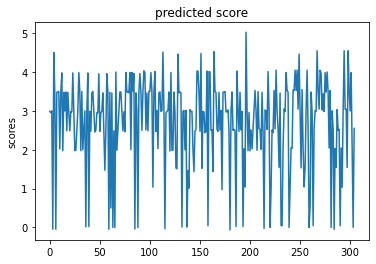

In [40]:
import matplotlib.pyplot as plt
plt.plot(ypred)
plt.title("predicted score")
plt.ylabel("scores")

Text(0, 0.5, 'scores')

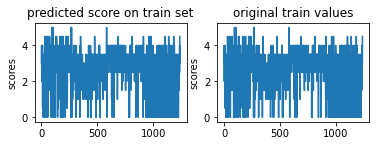

In [41]:
plt.subplot(2,2,1)
plt.plot(ypred_ontrain)
plt.title("predicted score on train set")
plt.ylabel("scores")
plt.subplot(2,2,2)
plt.plot(y)
plt.title("original train values")
plt.ylabel("scores")